In [17]:
import sklearn.neighbors, sklearn.pipeline, sklearn.preprocessing, sklearn.svm, sklearn.model_selection, sklearn.neural_network
import pandas as pd
import numpy as np
import tqdm
import librosa
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('/home/hugo/Thèse/styles.mplstyle')

import sys
sys.path.append('../src')

from features import *

In [18]:
results = pd.read_pickle('../models/results.pkl')

score_columns = ['precision', 'recall', 'fscore', 'roc', 'accuracy']
results['id'] = results.index + 1
results = pd.wide_to_long(results, score_columns, i='id', j='split', suffix='\\S+')
results.clf = results.clf.astype(str)
# results.clf__hidden_layer_sizes = results.clf__hidden_layer_sizes.astype(str)
# results.rename(columns={
#     'clf': 'Classifier', 
#     'sr' : 'Sample Rate',
#     'n_coeff': 'Number of coefficients'
# }, inplace=True)
# print(results)

In [8]:
agg = pd.DataFrame()
agg['mean'] = results.groupby(factors)[score].mean()
agg['std'] = results.groupby(factors)[score].std()
agg = agg.reset_index()

TypeError: incompatible index of inserted column with frame index

Text(0, 0.5, 'Accuracy')

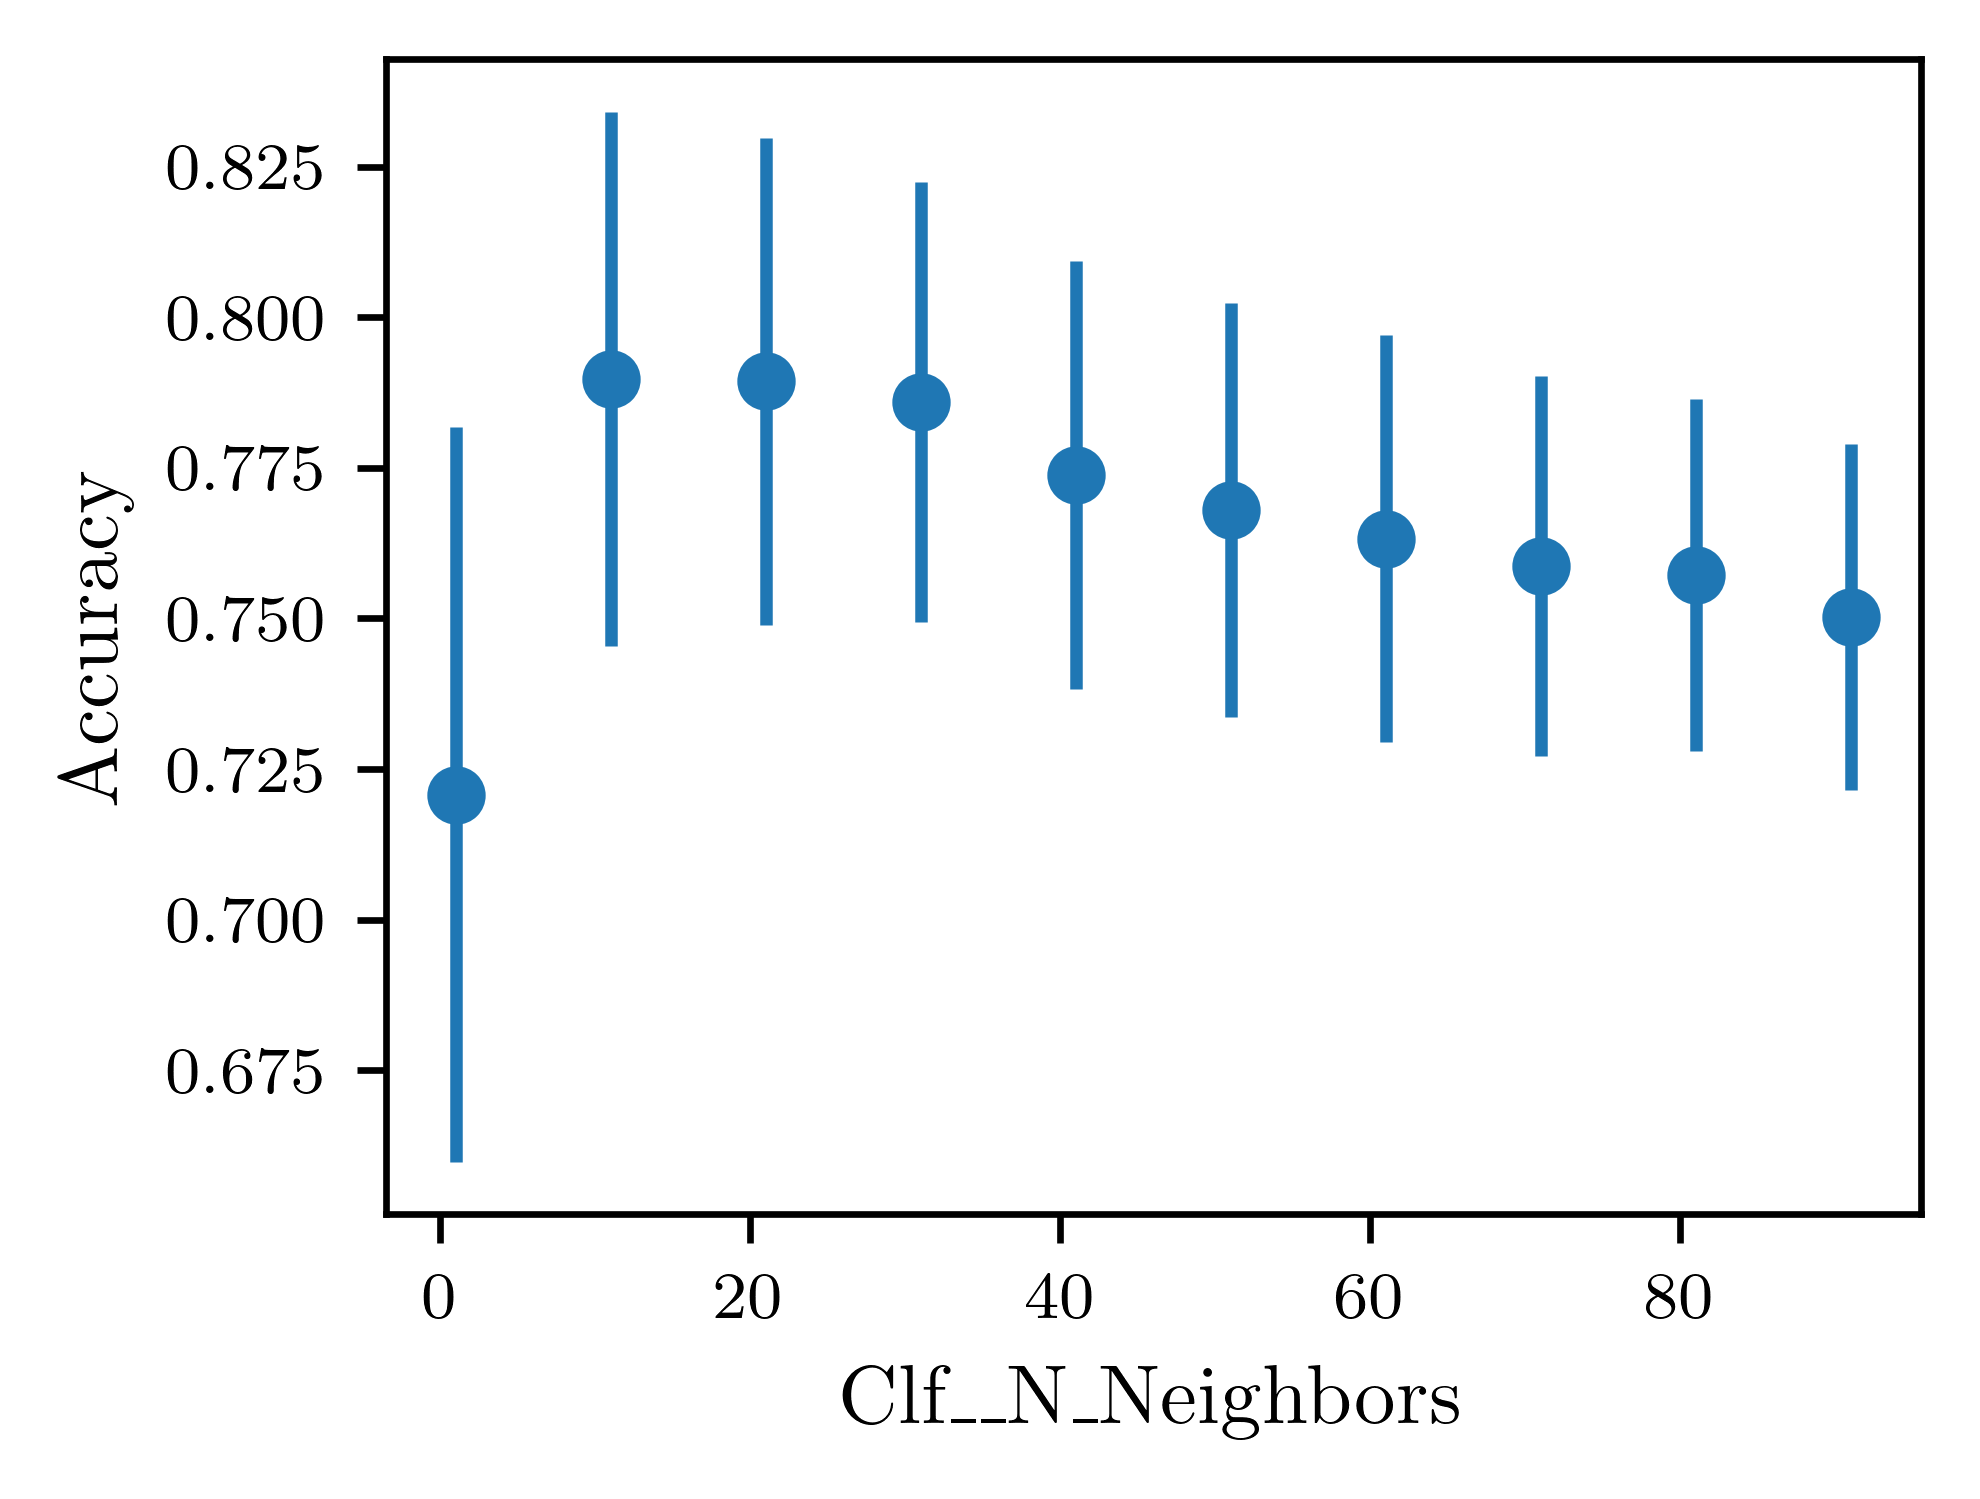

In [5]:
import matplotlib.pyplot as plt
plt.style.use('/home/hugo/Thèse/styles.mplstyle')

# results = results[results.clf == 'KNeighborsClassifier()']

score = 'accuracy'
factor = 'clf__n_neighbors'
agg = pd.DataFrame()
agg['mean'] = results.groupby(factor)[score].mean()
agg['std'] = 1.96 * results.groupby(factor)[score].std() / np.sqrt(results.groupby(factor)[score].count())

# Plots
fig, ax = plt.subplots()
ax.errorbar(x=agg.index, y='mean', yerr='std', data=agg, fmt='o')
# results.boxplot(column=[score], by=factor, ax=ax)
ax.set_title('')
fig.suptitle('')

ax.set_xlabel(factor.title())
# ax.set_xlabel('Classifier')
ax.set_ylabel(score.title())
# ax.set_xticklabels(['LTAS', 'LTCC', 'MFCC'])


# plt.figure()
# plt.plot(results[factor], results[score], 'o')
# plt.show()

# plt.savefig(f'../reports/figures/influence_{factor}.svg')

# scipy.stats.linregress(agg.index, agg['mean'])
# scipy.stats.linregress(results[factor], results[score])

In [14]:
print(agg.to_string())

                                            mean       std
sample_duration sr    clf__n_neighbors                    
10              5000  1                 0.266265  0.021574
                      11                0.289872  0.019677
                      21                0.304550  0.007720
                      31                0.311057  0.011527
                      41                0.319233  0.021124
                      51                0.323295  0.013581
                      61                0.326547  0.011398
                      71                0.328990  0.025907
                      81                0.313532  0.021013
                      91                0.311087  0.017053
                10000 1                 0.315145  0.026452
                      11                0.391677  0.034409
                      21                0.423444  0.038570
                      31                0.429992  0.033856
                      41                0.439761  0.0229

                             clf clf__decision_function_shape  \
id split                                                        
6  2      KNeighborsClassifier()                          NaN   
16 3             MLPClassifier()                          NaN   
11 3                       SVC()                          ovr   
17 2      KNeighborsClassifier()                          NaN   
32 4             MLPClassifier()                          NaN   
27 4                       SVC()                          ovr   
38 1      KNeighborsClassifier()                          NaN   
48 3             MLPClassifier()                          NaN   
43 3                       SVC()                          ovr   

         clf__hidden_layer_sizes clf__kernel  clf__max_iter  clf__n_neighbors  \
id split                                                                        
6  2                         NaN         NaN            NaN              51.0   
16 3                       (60,)         

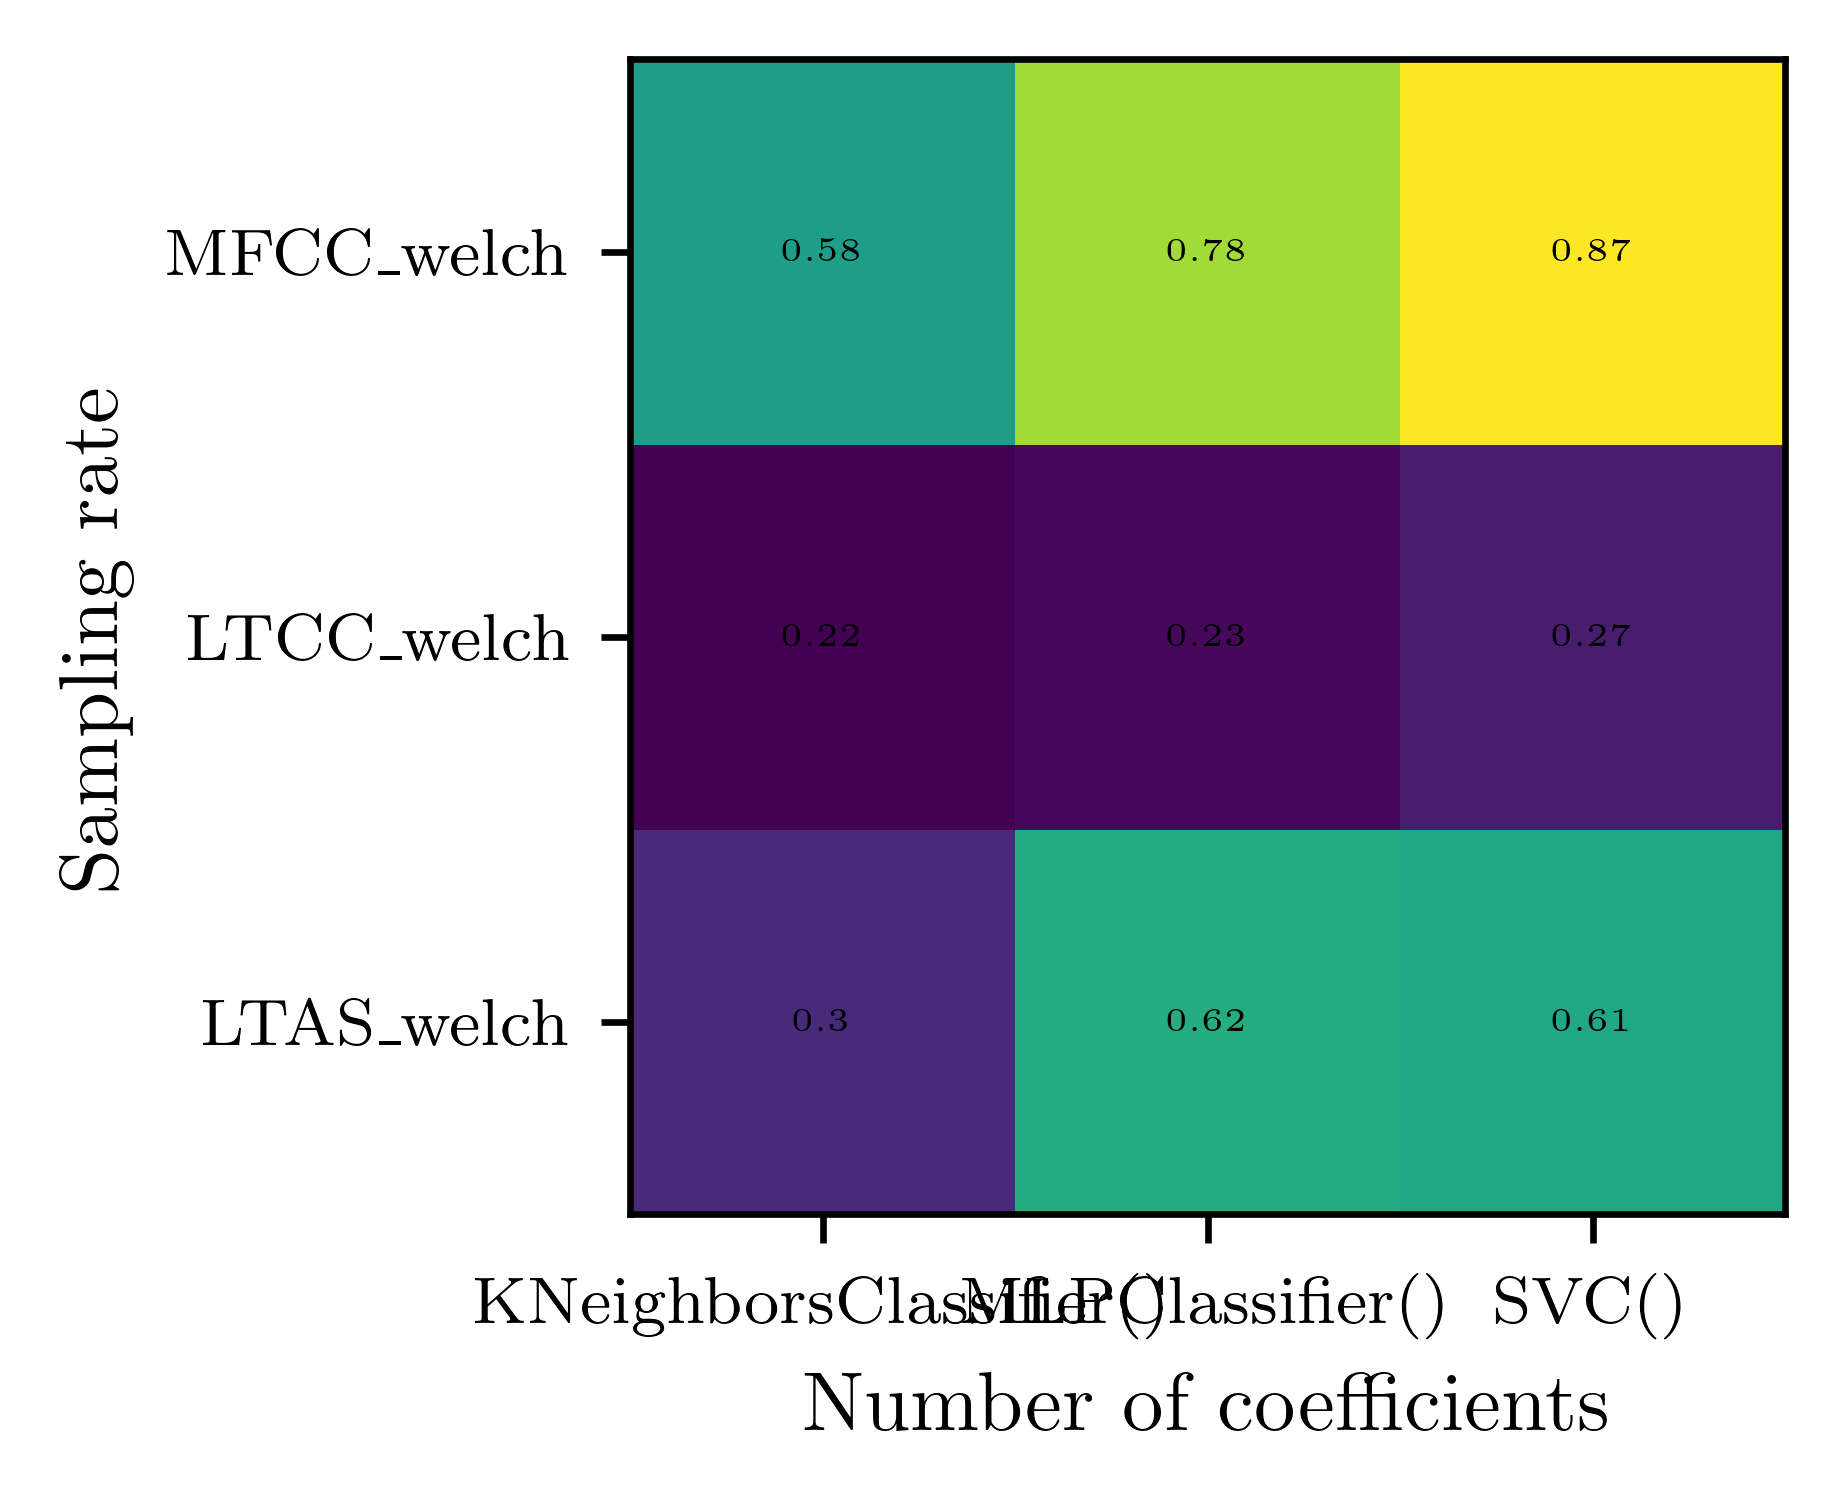

In [19]:
score = 'accuracy'
factors = ['feature', 'clf']

print(results.loc[results.groupby(factors)[score].idxmax()])

agg = pd.DataFrame()
agg['mean'] = results.groupby(factors)[score].max()
# agg['std'] = results.groupby(factors)[score].std()
agg = agg.reset_index()

agg = agg.pivot(columns=factors[1], index=factors[0], values='mean')

# Plots
fig, ax = plt.subplots()
im = ax.imshow(agg, origin='lower')
# fig.colorbar(im)
ax.set_yticks(np.arange(0, len(agg.index.values)))
ax.set_yticklabels(agg.index.values)
ax.set_xticks(np.arange(0, len(agg.columns.values)))
ax.set_xticklabels(agg.columns.values)
ax.set_xlabel(factors[1].title())
ax.set_ylabel(factors[0].title())

ax.set_ylabel('Sampling rate')
ax.set_xlabel('Number of coefficients')
# ax.set_yticklabels(['KNN', 'MLP', 'SVM'])
# ax.set_xticklabels(['LTAS', 'LTCC', 'MFCC'])

for i in range(len(agg.index.values)):
    for j in range(len(agg.columns.values)):
        text = ax.text(j, i, np.round(agg.iloc[i, j], 2), ha="center", va="center", color="black", size=4)


plt.savefig(f'../reports/figures/cross_influence_{factors[0]}_{factors[1]}.svg')